# Review of distributions, and Basic Bayes' theorem

In [2]:
import pandas as pd
import numpy as np
import scipy, scipy.stats
# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns
import pylab as pl

%matplotlib inline

### 1: Basics
####  Bayes' theorem is stated mathematically as the following equation:
$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$
####  where A and B are events and P(B) ≠ 0.
- P(A) and P(B) are the probabilities of observing A and B without regard to each other.
- P(A | B), a conditional probability, is the probability of observing event A given that B is true.
- P(B | A) is the probability of observing event B given that A is true.

#### Some notes: Independence
- When A and B are indipendent events: $P(A|B)=P(A)$ , $P(A\cap B)=P(A)P(B)$

### 2: Bayes' theorem, other form 

$$P(A|B)=\frac{P(B|A)P(A)}{P(B|A)P(A)+P(B|A^{not})P(A^{not})}=\frac{P(A\cap B)}{P(B)}$$
<br>
#### Bayes' theorem visualization:
<div><img src="pic/Bayes_theorem.png"></div>

- When there are three possible outcomes A1, A2, and A3 such that exactly one of these must happen, then Bayes Theorem expands to: 

$$P(A_1|B)=\frac{P(B|A_1)P(A_1)}{P(B|A_1)P(A_1)+P(B|A_2)P(A_2)+P(B|A_3)P(A_3)}$$

- If the events $A_1$, . . . , $A_m$ form a partition of the space (exactly one of the $A_i$’s must occur,i.e., the $A_i$’s are mutually exclusive and $\sum_{i=1}^{m}P(A_i) = 1$), then we can write Bayes Theorem as:

$$P(A_i|B)=\frac{P(B|A_1)P(A_1)}{\sum_{i=1}^{m}P(B|A_i)P(A_i)}$$

### 3. Review of Distributions:

#### 3.1 Bernoulli distribution 
Bernoulli distribution is the probability distribution of a random variable which takes the value 1 with success probability of  $p$ and the value 0 with failure probability of $q=1-p$.

- This can also be expressed as:

    $f(k;p)=p^{k}(1-p)^{1-k}$ for $k \in \{0,1\}$ 
    
    This is also the probability density function.
    
- Expected value:
    
    $E[X] = \sum_{x}P(X=x)=(1)P+0(1-p)=p$
    
    $Var(x) = p(1-p)$
    

#### 3.2 Binomial Distribution 

the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent yes/no experiments, each of which yields success with probability p.

- X ~ Bin(n,p), X is a random variable
- Probability mass function: 

    $f(X=x|p)=Pr(x|p)=\binom {n}{x}p^x(1-p)^{n-x}  \hspace{1cm}$ (x is a realization of a random variable)
    
    $\binom{n}{x}=\frac {n!}{x!(n-x)!}\quad\mathrm{for}\quad x \in \{0,1,...,n\}$
    
    $E[X]=np,\quad  Var(X)=np(1-p)$


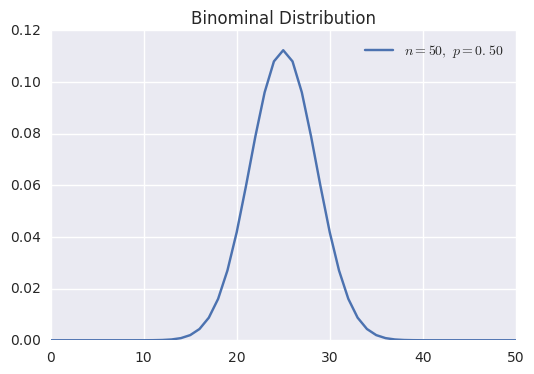

In [84]:
n, p = 50, .5                   # number of trials, probability of each trial
x = scipy.linspace(0,n,n+1)     # make x to be 0 to 10 
pmf = scipy.stats.binom.pmf(x,n,p)
import pylab
pylab.plot(x,pmf,label='$n=%i,\ p=%.2f$' % (n, p))
pylab.title('Binominal Distribution')
pylab.legend()

#### 3.3 Uniform distribution

The probability density function of the continuous uniform distribution is:
$$
P(x)=\left\{ 
\begin{array}{l}
\frac{1}{b-a}\hspace{1cm}\mathrm{for}\quad a\leqslant x \leqslant b \\ 
0\hspace{1cm}\mathrm{for}\quad x<a\quad\mathrm{or} \quad x>b 
\end{array}
\right. 
$$
$$
P(a<x<b) = \int_{a}^{b}P(x)dx
$$

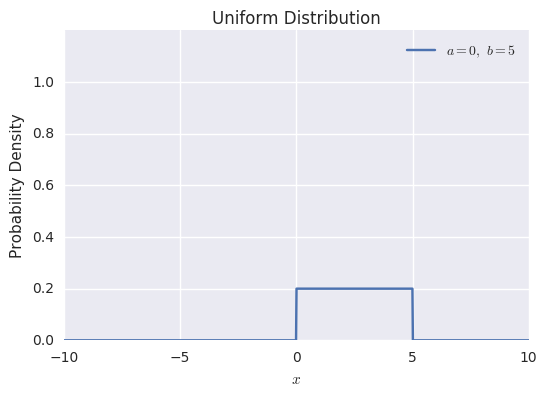

In [85]:
# Define the distribution parameters to be plotted
a,b = 0,5
x = np.linspace(-10, 10, 1000)

# plot the distributions
fig, ax = plt.subplots(1,1)
dist = scipy.stats.uniform(a, b)
plt.plot(x, dist.pdf(x), ls='-',label=r'$a=%i,\ b=%i$' % (a, b))
plt.xlim(-10, 10)
plt.ylim(0, 1.2)
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.title('Uniform Distribution')

plt.legend()
plt.show()

#### 3.4 Exponential and normal distributions 

The exponential distribution is used to model the time between the occurrence of events in an interval of time, or the distance between events in space. The exponential distribution may be useful to model events such as
- The time between goals scored in a World Cup soccer match
- The duration of a phone call to a help center
- The time between successive failures of a machine

The exponential distribution is an appropriate model if the following conditions are true:
- X is the time (or distance) between events, with X > 0.
- The occurrence of one event does not affect the probability that a second event will occur. That is, events occur independently.
- The rate at which events occur is constant. The rate cannot be higher in some intervals and lower in other intervals.
- Two events cannot occur at exactly the same instant.

If these conditions are true, then X is an exponential random variable, and the distribution of X is an exponential distribution.
##### The exponential distribution is specified by the single parameter lambda (λ). Lambda is the event rate, and may have different names in other applications:
- event rate
- rate parameter
- arrival rate
- death rate
- failure rate
- transition rate

#### Exponential distribution density function:
$$X\sim Exp(\lambda)$$
$$P(x|\lambda)=\lambda e^{-\lambda x}$$
$$E[X] = \frac{1}{\lambda}$$
$$Var[X]= \frac{1}{\lambda^2}$$

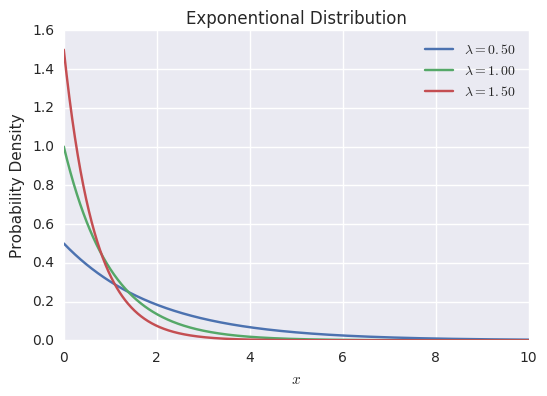

In [125]:
# Define the distribution parameters to be plotted
lamb_list = [0.5,1,1.5]
x = np.linspace(0, 10, 1000)

# plot the distributions
fig, ax = plt.subplots(1,1)
for lamb in lamb_list:
    pdf = scipy.stats.expon.pdf(x,scale= 1/lamb)                        # in scipy, scale is defined as 1/lambda
    plt.plot(x, pdf, ls='-',label=r'$\lambda=%.2f$' % (lamb))

plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.title('Exponentional Distribution')
plt.legend()
plt.show()

#### 3.5 Normal distribution 

The probability density of the normal distribution is:
$$X \sim N(\mu,\sigma^2)$$
$$\displaystyle P(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\sigma ^{2}\pi }}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$
$$E[X]=\mu$$
$$Var(x) = \sigma^2$$

Where:
- $\mu $ is mean or expectation of the distribution (and also its median and mode).
- $\sigma  $  is standard deviation
- $\sigma ^{2} $ is variance

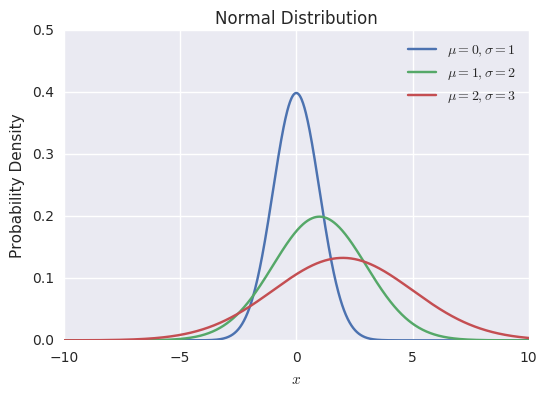

In [137]:
# Plot a normal distribution
mean_list = [0,1,2]
sigma_list = [1,2,3]
# Plot between -10 and 10 with .001 steps.
x = np.linspace(-10, 10, 1000)

for mean,sigma in zip(mean_list,sigma_list):
    plt.plot(x, scipy.stats.norm.pdf(x, mean, sigma),label='$\mu=%.0f,\sigma=%.0f$' % (mean,sigma))

plt.ylim(0, .5)
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.legend()
plt.show()

#### 3.6 Geometric distribution 

The geometric distribution is the number of trials needed to get the first success, i.e., the number of Bernoulli events until a success is observed, such as the first head when flipping a coin. It takes values on the positive integers starting with one (since at least one trial is needed to observe a success).

$$X \sim Geo(p)$$
$$P(X=x|p)=p(1-p)^{x-1} \quad\mathrm{for}\quad x=1,2,....$$
$$E[X] = \frac{1}{p}$$

#### 3.7 Poisson Distribution 

The Poisson distribution is used for counts, and arises in a variety of situations. The parameter λ > 0 is the rate at which we expect to observe the thing we are counting. So it is a bit like Exponential distribution whchis about a period of time. This is about counting. 

Examples:
- The number of patients arriving in an emergency room between 11 and 12 pm


$$X \sim Pois(\lambda)$$

$$P(X=x|\lambda)={\frac {\lambda ^{k}e^{-\lambda }}{x!}} \quad\mathrm{for}\quad x=1,2,.... $$

$$E[X]=\lambda$$

$$Var[X]=\lambda$$
$$\lambda \text{ is the average number of events per interval}$$

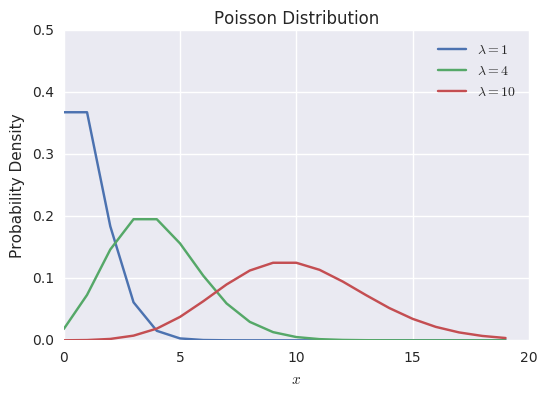

In [146]:
# Plot a normal distribution
lamb_list = [1,4,10]      # lambda is the average number of events per inteval 
x = np.arange(0,20)

for lamb in lamb_list:
    plt.plot(x, scipy.stats.poisson.pmf(x, lamb),label='$\lambda=%.0f$' % (lamb))

plt.ylim(0, .5)
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.title('Poisson Distribution')
plt.legend()
plt.show()

#### 3.8 Gamma Distribution 

If $X_1, X_2, . . . , X_n$ are independent (and identically distributed $Exp(\lambda))$ waiting times between
successive events, then the total waiting time for all $n$ events to occur $Y =\sum_{i=1}^{n}X_i$ will
follow a gamma distribution with shape parameter $α = n$ and rate parameter $\beta = \lambda$.

$$Y \sim \Gamma(\alpha, \beta) \equiv \textrm{Gamma}(\alpha,\beta)$$
probability density function:
$$\displaystyle f(y|\alpha ,\beta )={\frac {\beta ^{\alpha }x^{\alpha -1}e^{-x\beta }}{\Gamma (\alpha )}}\quad {\text{ for }}x\geq 0{\text{ and }}\alpha ,\beta >0.$$
$$\Gamma(.)$$ is the gamma function,  If $n$ is a positive integer, then $\Gamma(n) = (n − 1)!$.


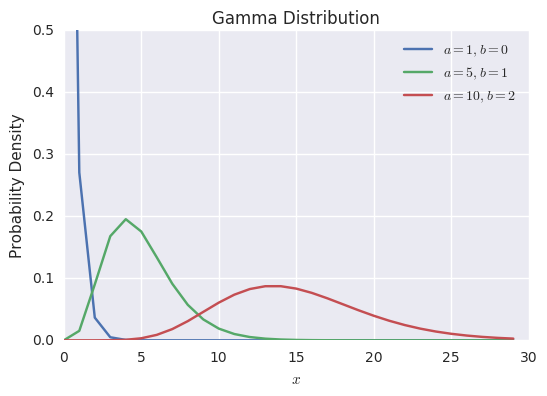

In [162]:
# Plot a normal distribution
a_list = [1,5,10]      
b_list = [0.5,1,1.5]              # parameter  α=nα=n  and rate parameter β=λ .
x = np.arange(0,30)

for a,b in zip(a_list,b_list):
    plt.plot(x, scipy.stats.gamma.pdf(x, a,scale=b),label='$a=%.0f,b= %.0f$' % (a,b))

plt.ylim(0, .5)
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.title('Gamma Distribution')
plt.legend()
plt.show()

### 3.9 Beta Distribution

The beta distribution is used for random variables which take on values between 0 and 1. The beta distribution is commonly used to model probabilities.it is parametrized by two positive shape parameters, denoted by α and β, that appear as exponents of the random variable and control the shape of the distribution.

In Bayesian inference, the beta distribution is the conjugate prior probability distribution for the Bernoulli, binomial, negative binomial and geometric distributions. For example, the beta distribution can be used in Bayesian analysis to describe initial knowledge concerning probability of success such as the probability that a space vehicle will successfully complete a specified mission. The beta distribution is a suitable model for the random behavior of percentages and proportions.

$$X \sim Beta(\alpha,\beta)$$

$$
\begin{align}
f(x;\alpha,\beta) & = \mathrm{constant}\cdot x^{\alpha-1}(1-x)^{\beta-1} \\
& = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1} \\[6pt]
\end{align}
$$

$$E[X]=\frac{\alpha}{\alpha+\beta}$$

$$Var[X]=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$$

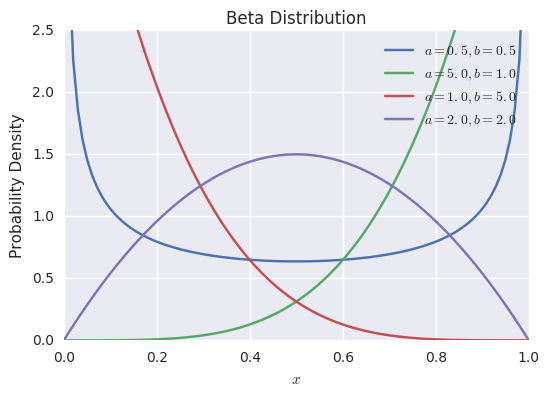

In [175]:
# Plot a normal distribution
a_list = [0.5,5,1,2]
b_list = [0.5,1,5,2]
# Plot between -10 and 10 with .001 steps.
x = np.linspace(0, 1, 100)

for a,b in zip(a_list,b_list):
    plt.plot(x, scipy.stats.beta.pdf(x, a, b),label='$a=%.1f,b=%.1f$' % (a,b))

plt.ylim(0, 2.5)
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.title('Beta Distribution')
plt.legend()
plt.show()